# Восстановление золота из руды

Компания «Цифра» разрабатывает решения для эффективной работы промышленных предприятий. Для золотодобывающей компании требуется решение, которое поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. При разработке решения потребуется использовать данные с параметрами добычи и очистки.

### Цель исследования 

Необходимо подготовить прототип модели машинного обучения, которая предсказывала бы коэффициент восстановления золота из золотосодержащей руды.

### Ход исследования

Исследование пройдет в 3 основных этапа:

- Подготовка данных;
- Проведение исследовательского анализа данных;
- Построение и обучение модели.

## Подготовка данных

Для начала надо загрузить необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [2]:
try:
    df_full = pd.read_csv('/Users/vladislav/Documents/datasets/gold_recovery_full_new.csv')
    df_train = pd.read_csv('/Users/vladislav/Documents/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/Users/vladislav/Documents/datasets/gold_recovery_test_new.csv')
except:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')    

datasets = [df_full, df_train, df_test]
names = ['df_full', 'df_train', 'df_test']

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

Далее необходимо провести первичный осмотр данных. В условиях исследования сказано, что исходный датасет содержит обучающую и тестовую выборки со всеми признаками. Поэтому для общей картины проще изучить его:

In [4]:
for name,frame in zip(names,datasets):
    print("-------",name,"-------")
    frame.info()

------- df_full -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               

In [5]:
for name,frame in zip(names,datasets):
    display(name)
    display(frame.head(3))

'df_full'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'df_train'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'df_test'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


Видно, что все данные представлены в числовом формате за исключением столбца date.

In [6]:
train_size = len(df_train)/len(df_full)
test_size = len(df_test)/len(df_full)
display(f"Доля обучающей выборки: {train_size:.2%}, доля тестовой выборки: {test_size:.2%}")

'Доля обучающей выборки: 72.79%, доля тестовой выборки: 27.21%'

Далее необходимо проверить правильность расчета показателя эффективности обогащения.

In [7]:
df_train['rougher.output.recovery.check'] = (df_train['rougher.output.concentrate_au'] * (
    df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))/ (df_train['rougher.input.feed_au'] * (
    df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))*100

In [8]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery.check'])

9.73512347450521e-15

По итогам расчета <b>MAE</b> проверки показателя <b>*rougher.output.recovery*</b> установлено, что разница в посчитанных и представленных изначально значениях ничтожно мала и является результатом округления. Таким образом исходные значения <b>*rougher.output.recovery*</b> даны верно.

Также в исходной информации сказано, что в тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей. Важно понять, какие признаки отсутствуют.

In [9]:
full_train_difference = sorted(df_full.columns.difference(df_train.columns))
full_train_difference

[]

In [10]:
full_test_difference = sorted(df_full.columns.difference(df_test.columns))
full_test_difference

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Принимая во внимание, что в вводных условиях данные обозначены следующим образом:

<b>Возможные значения для блока этап:</b>

    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики

<b>Возможные значения для блока тип_параметра:</b>

    input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики

Можно обобщить, что отсутствующие данные в <b>df_test</b> показывают состояния продукта после этапов флотации и очисток, а также содержат расчетные характеристики и целевые значения эффективности обогащения.  Необходимо добавить часть данных в тестовую выборку, которые впоследствии понадобятся.

In [11]:
df_full_merge = df_full[["date", "rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol"]]

In [12]:
df_test = df_test.merge(df_full_merge, on="date", how="left")
df_full_merge = df_full_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [13]:
df_train = df_train.drop("date", axis=1)
df_test = df_test.drop("date", axis=1)
df_full = df_full.drop("date", axis=1)

In [14]:
df_train.loc[df_train['primary_cleaner.output.tail_pb'].isna()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery.check
635,9.602057,9.964730,7.305721,31.274820,77.160264,10.103100,0.831544,20.572343,1.688638,136.596074,12.945120,8.270,1.376551,12.311998,7.102699,12.262044,27.485430,7.914200,NaN,12.239651,0.830186,1800.642597,-350.474095,1800.709972,-350.273448,1790.905866,-350.162615,1484.142310,-349.633029,47088.662475,2900.698251,2897.734526,2.476920,7.890077,2.524446,497.995505,55.290900,36.322533,6.252849,10.305657,7.124486,10.305019,7.125324,11.613526,7.438414,21.180821,15.060745,83.457099,5.555928,0.729999,22.899019,1.582849,999.964140,-499.996057,1501.003334,-399.239510,1500.997218,-399.611361,1499.983604,-400.072987,1498.960491,-401.760516,1500.081156,-400.789799,7.451187,1.799981,12.540482,1.269836,32.035911,-400.020086,31.003303,-399.733570,31.021522,-400.503178,29.025841,-400.754552,22.017859,-399.224897,22.029219,-393.813539,23.004333,-396.639337,20.983838,-399.875392,25.002918,-399.205469,83.457099
636,9.310326,10.401585,6.833288,32.312779,74.495895,10.066996,0.935192,21.537314,1.767085,134.857254,15.771211,8.270,1.250942,12.005118,7.4

In [15]:
df_full.loc[df_full['primary_cleaner.output.tail_pb'].isna()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
635,9.602057,9.964730,7.305721,31.274820,77.160264,10.103100,0.831544,20.572343,1.688638,136.596074,12.945120,8.270,1.376551,12.311998,7.102699,12.262044,27.485430,7.914200,NaN,12.239651,0.830186,1800.642597,-350.474095,1800.709972,-350.273448,1790.905866,-350.162615,1484.142310,-349.633029,47088.662475,2900.698251,2897.734526,2.476920,7.890077,2.524446,497.995505,55.290900,36.322533,6.252849,10.305657,7.124486,10.305019,7.125324,11.613526,7.438414,21.180821,15.060745,83.457099,5.555928,0.729999,22.899019,1.582849,999.964140,-499.996057,1501.003334,-399.239510,1500.997218,-399.611361,1499.983604,-400.072987,1498.960491,-401.760516,1500.081156,-400.789799,7.451187,1.799981,12.540482,1.269836,32.035911,-400.020086,31.003303,-399.733570,31.021522,-400.503178,29.025841,-400.754552,22.017859,-399.224897,22.029219,-393.813539,23.004333,-396.639337,20.983838,-399.875392,25.002918,-399.205469
636,9.310326,10.401585,6.833288,32.312779,74.495895,10.066996,0.935192,21.537314,1.767085,134.857254,15.771211,8.270,1.250942,12.005118,7.440157,12.229312,27.852467,7.573096,NaN,1

По данным видно, что соседние значения в рамках одной даты близки, тогда одним из наиболее оптимальных способов будет подтянуть данные из соседних строк.

In [16]:
df_full = df_full.fillna(method='ffill')

In [17]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,1.943900e+04,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439

Аналогичным образом можно заполнить пропуски в других выборках:

In [18]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

## Проведение исследовательского анализа данных

### Изменение концентрации элементов на каждом этапе

In [19]:
def concentrate_of_metal_dist(metal, title):
    x0 = df_full[f'rougher.input.feed_{metal}']
    x1 = df_full[f'rougher.output.concentrate_{metal}']
    x2 = df_full[f'primary_cleaner.output.concentrate_{metal}']
    x3 = df_full[f'final.output.concentrate_{metal}']

    plt.figure(figsize=(15, 6))

    sns.distplot(x0, kde_kws={"label": "Сырье"})
    sns.distplot(x1, kde_kws={"label": "Продукт флотации"})
    sns.distplot(x2, kde_kws={"label": "Первичная очистка"})
    sns.distplot(x3, kde_kws={"label": "Финальный этап"})

    plt.title(label=f'Концентрация {title} на разных этапах очистки', fontsize=14)
    plt.legend()
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.show()

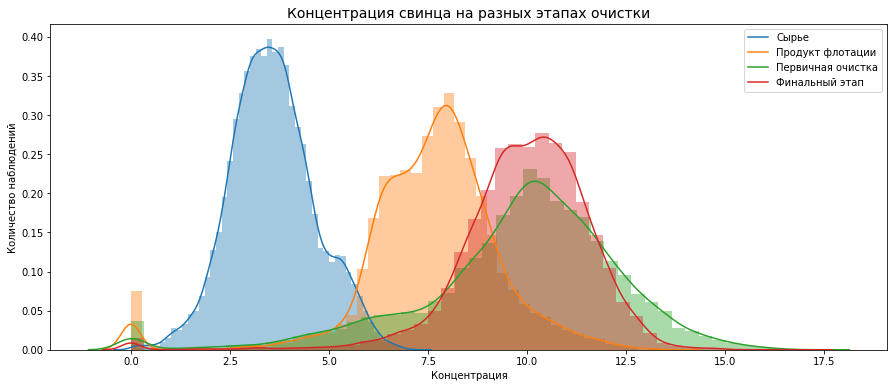

In [20]:
concentrate_of_metal_dist('pb', 'свинца')

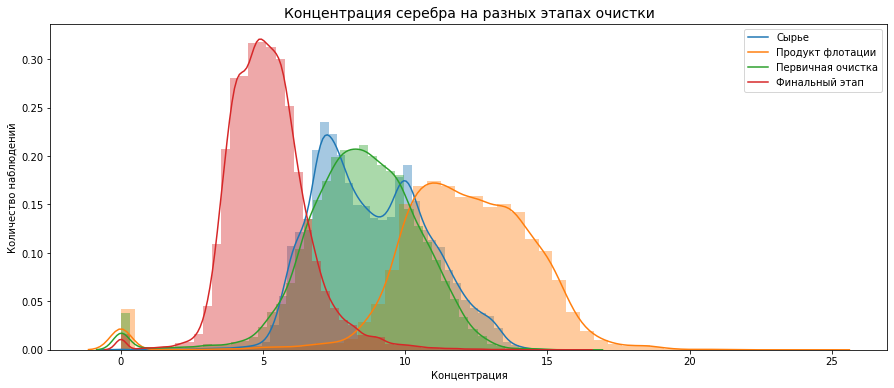

In [21]:
concentrate_of_metal_dist('ag', 'серебра')

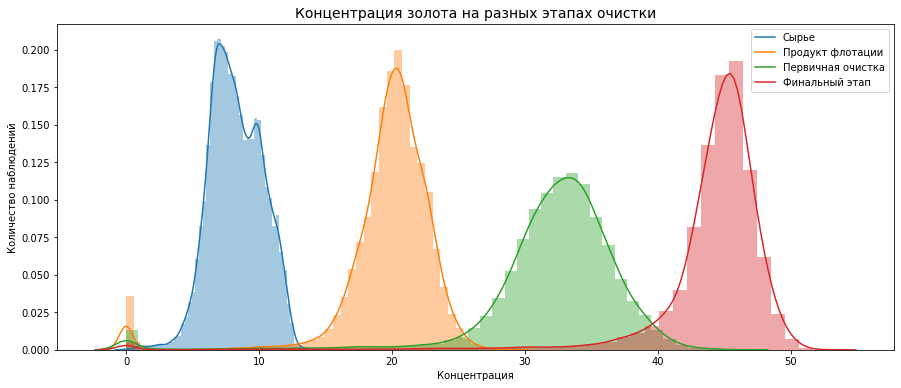

In [22]:
concentrate_of_metal_dist('au', 'золота')

<b>Вывод:</b>

- Концентрация свинца повышается после флотации и незначительно изменяется в дальнейшем

- Концентрация серебра увеличивается после флотации и уменьшается после следующих этапов

- Концентрация золота увеличивается после каждого этапа очистки

### Анализ распределения размеров гранул на обучающей и тестовой выборках

In [23]:
def feed_size_dist(step, title):
    x0 = df_train[f'{step}.input.feed_size']
    x1 = df_test[f'{step}.input.feed_size']
    
    plt.figure(figsize=(15, 6))
    
    sns.distplot(x0, kde_kws= {"label": "Train"})
    sns.distplot(x1, kde_kws= {"label": "Test"})
    
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.title(label=f'Распределение размеров гранул сырья для {title}', fontsize=14)

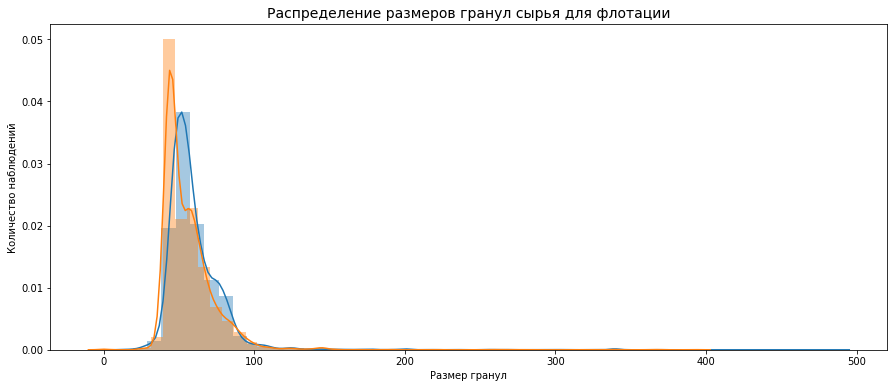

In [24]:
feed_size_dist('rougher', 'флотации')

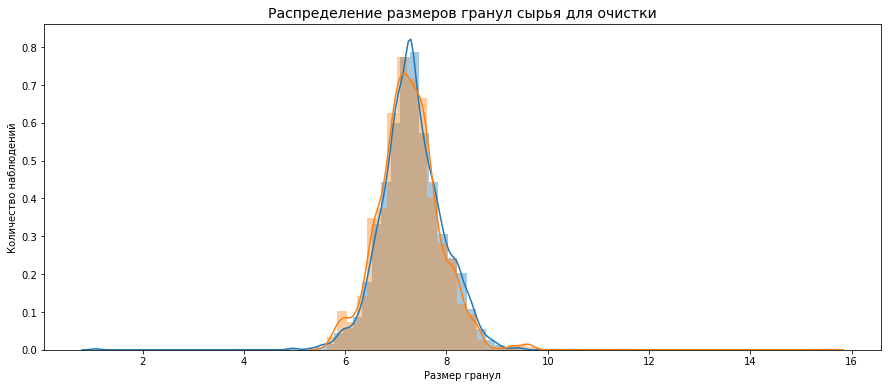

In [25]:
feed_size_dist('primary_cleaner', 'очистки')

<b>Вывод:</b> 

- Размеры гранул распределенны схожим образом на этапе флотации и первичной очистки в обучающей и тестовой выборках.

### Суммарная концентрация всех веществ на разных этапах очистки

In [26]:
metals = ['au', 'ag', 'pb', 'sol']

steps = ['rougher.input.feed_',
         'rougher.output.concentrate_', 
         'final.output.concentrate_']

In [27]:
def metal_sum(df, metals, steps):
    for step in steps:
        df[step] = df[step + metals[0]] + df[step + metals[1]] + df[step + metals[2]] + df[step + metals[3]]

In [28]:
metal_sum(df_full, metals, steps)

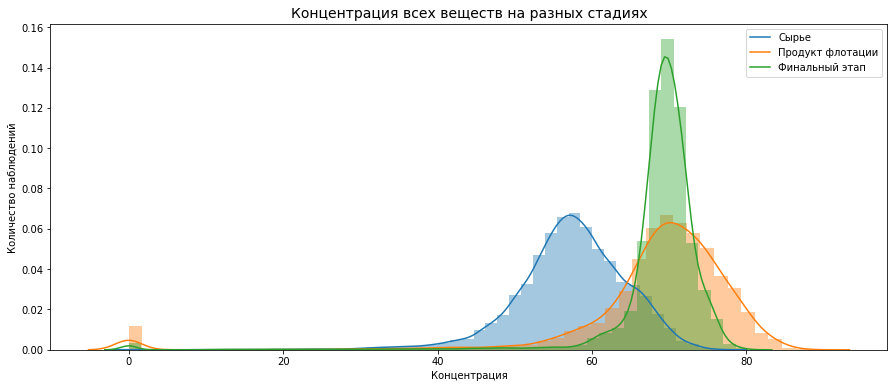

In [29]:
x0 = df_full['rougher.input.feed_']
x1 = df_full['rougher.output.concentrate_']
x2 = df_full['final.output.concentrate_']

plt.figure(figsize=(15, 6))

sns.distplot(x0, kde_kws= {"label": "Сырье"})
sns.distplot(x1, kde_kws= {"label": "Продукт флотации"})
sns.distplot(x2, kde_kws= {"label": "Финальный этап"})


plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=14)
plt.legend()
plt.show()

<b>Вывод:</b>

- После флотации увеличивается концентрация веществ и далее в ходе очистки сокращается интервал распределения с 55-85 до 65-80.

- Все распределения концентраций на различных стадиях показывают аномальные значения при 0%. Вероятно хоть какой-то из металлов должен быть в более высокой концентрации, поэтому стоит удалить эти значения из обеих выборок (концентрация которых менее 10%), чтобы обеспечить точность модели.

## Построение модели прогнозирования

### Функция для вычисления итогового sMAPE

Следующим этапом следует написать функцию по расчету sMAPE:

In [30]:
def smape(y_target, y_pred):
    return ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100

In [31]:
smape_score = make_scorer(smape, greater_is_better=False)

### Обучение и проверка моделей

Далее надо создать агрегированные столбцы по сумме концентраций всех металлов в обучающей и тестовой выборках по аналогии с исходной выборкой. После этого можно будет удалить строки, концентрация в которых ниже 10%.

In [32]:
metal_sum(df_train, metals, steps)

In [33]:
metal_sum(df_test, metals, steps)

In [34]:
df_train = df_train[(df_train['rougher.input.feed_']>10) & 
                    (df_train['rougher.output.concentrate_']>10) & 
                    (df_train['final.output.concentrate_']>10)]

In [35]:
df_test = df_test[(df_test['rougher.input.feed_']>10) & 
                    (df_test['rougher.output.concentrate_']>10) & 
                    (df_test['final.output.concentrate_']>10)]

Вспомогательные столбцы с суммарной концентрацией металлов больше не нужны, их можно удалить.

In [36]:
df_train.drop(['rougher.input.feed_','rougher.output.concentrate_','final.output.concentrate_'], 
              axis=1, inplace=True)

In [37]:
df_test.drop(['rougher.input.feed_','rougher.output.concentrate_','final.output.concentrate_'], 
              axis=1, inplace=True)

Оставим в обучающей выборке только те столбцы, которые присутствуют в тестовом наборе данных и далее и разделим их по целевому и вспомогательным признакам.

In [38]:
df_train = df_train.loc[:, list(df_test.columns)]

In [39]:
features_train = df_train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train_rougher = df_train["rougher.output.recovery"]
target_train_final = df_train["final.output.recovery"]

In [40]:
feature_scaler = StandardScaler()
features_train = pd.DataFrame(feature_scaler.fit_transform(features_train))

In [41]:
features_test = df_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test_rougher = df_test["rougher.output.recovery"]
target_test_final = df_test["final.output.recovery"]
features_test = pd.DataFrame(feature_scaler.transform(features_test))

In [42]:
state = np.random.RandomState(12345)

Данные подготовлены, теперь можно приступать к обучению моделей и подбору гиперпараметров.

#### Decision Tree Regressor

In [51]:
params_dtr_grid = {'max_depth' : range(1,5)}

grid_decision_tree_regr_rougher = GridSearchCV(DecisionTreeRegressor(random_state=state), 
                                               param_grid = params_dtr_grid, 
                                               cv=5, 
                                               n_jobs=-1, 
                                               scoring=smape_score) 

grid_decision_tree_regr_rougher.fit(features_train, target_train_rougher)
params_dtr_rougher = grid_decision_tree_regr_rougher.best_params_
decision_tree_regr_rougher = DecisionTreeRegressor(**params_dtr_rougher, random_state = state)
decision_tree_regr_rougher.fit(features_train, target_train_rougher)
print('Best params for model: ', grid_decision_tree_regr_rougher.best_params_)

Best params for model:  {'max_depth': 3}


In [52]:
grid_decision_tree_regr_final = GridSearchCV(DecisionTreeRegressor(random_state=state), 
                                             param_grid = params_dtr_grid, 
                                             cv=5, 
                                             n_jobs=-1, 
                                             scoring=smape_score) 

grid_decision_tree_regr_final.fit(features_train, target_train_final)
params_dtr_final = grid_decision_tree_regr_final.best_params_
decision_tree_regr_final = DecisionTreeRegressor(**params_dtr_final, random_state = state)
decision_tree_regr_final.fit(features_train, target_train_final)
print('Best params for model: ', grid_decision_tree_regr_final.best_params_)

Best params for model:  {'max_depth': 2}


In [53]:
pred_dtr_rough = decision_tree_regr_rougher.predict(features_test)
smape_dtr_rougher = smape(df_full.loc[features_test.index, 'rougher.output.recovery'], pred_dtr_rough)

pred_dtr_final = decision_tree_regr_final.predict(features_test)
smape_dtr_final = smape(df_full.loc[features_test.index, 'final.output.recovery'], pred_dtr_final)
smape_dtr_rougher, smape_dtr_final

(13.294511377797466, 11.536789238894912)

In [54]:
total_dtr_smape = 0.25*smape_dtr_rougher + 0.75*smape_dtr_final
total_dtr_smape

11.97621977362055

#### Random Forest

In [55]:
param_rf_grid = {
        'max_depth' : range(1,5),
        'n_estimators' : [2,15]}
grid_random_forest_regr_rougher = GridSearchCV(RandomForestRegressor(random_state=state), 
                                               param_grid = param_rf_grid, 
                                               cv=5, 
                                               n_jobs=-1, 
                                               scoring=smape_score)

grid_random_forest_regr_rougher.fit(features_train, target_train_rougher)
params_rf_rougher = grid_random_forest_regr_rougher.best_params_
random_forest_regr_rougher = RandomForestRegressor(**params_rf_rougher, random_state = state)
random_forest_regr_rougher.fit(features_train, target_train_rougher)
print('Best params for model: ', grid_random_forest_regr_rougher.best_params_)

Best params for model:  {'max_depth': 3, 'n_estimators': 15}


In [56]:
grid_random_forest_regr_final = GridSearchCV(RandomForestRegressor(random_state=state), 
                                             param_grid = param_rf_grid, 
                                             cv=5, 
                                             n_jobs=-1, 
                                             scoring=smape_score) 

grid_random_forest_regr_final.fit(features_train, target_train_final)
params_rf_final = grid_random_forest_regr_final.best_params_
random_forest_regr_final = RandomForestRegressor(**params_rf_final, random_state = state)
random_forest_regr_final.fit(features_train, target_train_final)
print('Best params for model: ', grid_random_forest_regr_final.best_params_)

Best params for model:  {'max_depth': 4, 'n_estimators': 15}


In [57]:
pred_rf_rough = random_forest_regr_rougher.predict(features_test)
smape_rf_rougher = smape(df_full.loc[features_test.index, 'rougher.output.recovery'], pred_rf_rough)

pred_rf_final = random_forest_regr_final.predict(features_test)
smape_rf_final = smape(df_full.loc[features_test.index, 'final.output.recovery'], pred_rf_final)
smape_rf_final, smape_rf_rougher

(12.36182252986729, 13.055875742295237)

In [58]:
total_rf_smape = 0.25*smape_rf_rougher + 0.75*smape_rf_final
total_rf_smape

12.535335832974276

#### Linear Regression

In [59]:
param_lr_grid = {'fit_intercept':[True, False],
             'normalize':[True, False],
             'copy_X':[True, False]}

grid_line_regr_rougher = GridSearchCV(LinearRegression(), 
                                      param_grid = param_lr_grid, 
                                      n_jobs=-1, 
                                      cv = 5, 
                                      scoring = smape_score)

grid_line_regr_rougher.fit(features_train, target_train_rougher)
params_lr_rougher = grid_line_regr_rougher.best_params_
line_regr_rougher = LinearRegression(**params_lr_rougher)
line_regr_rougher.fit(features_train, target_train_rougher)
                      
print('Best params for model: ', grid_line_regr_rougher.best_params_)

Best params for model:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [60]:
grid_line_regr_final = GridSearchCV(LinearRegression(), 
                                    param_grid = param_lr_grid, 
                                    n_jobs=-1, 
                                    cv = 5, 
                                    scoring = smape_score)

grid_line_regr_final.fit(features_train, target_train_final)
params_lr_final = grid_line_regr_final.best_params_
line_regr_final = LinearRegression(**params_lr_final)
line_regr_final.fit(features_train, target_train_final)
print('Best params for model: ', grid_line_regr_final.best_params_)

Best params for model:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [61]:
pred_lr_rough = line_regr_rougher.predict(features_test)
smape_lr_rougher = smape(df_full.loc[features_test.index, 'rougher.output.recovery'], pred_lr_rough)

pred_lr_final = line_regr_final.predict(features_test)
smape_lr_final = smape(df_full.loc[features_test.index, 'final.output.recovery'], pred_lr_final)
smape_lr_final, smape_lr_rougher

(14.056280876335395, 13.869267472145799)

In [62]:
total_lr_smape = 0.25*smape_lr_rougher + 0.75*smape_lr_final
total_lr_smape

14.009527525287996

Теперь для ориентира необходимо получить sMAPE константной модели.

In [43]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(features_train, target_train_rougher)

dummy_pred_rougher = dummy_regr.predict(features_test)
smape_dummy_rougher = smape(df_full.loc[features_test.index, 'rougher.output.recovery'], dummy_pred_rougher)

smape_dummy_rougher

12.50834851634226

In [44]:
dummy_regr.fit(features_train, target_train_final)

dummy_pred_final = dummy_regr.predict(features_test)
smape_dummy_final = smape(df_full.loc[features_test.index, 'final.output.recovery'], dummy_pred_final)
smape_dummy_final

10.824344785935375

In [45]:
total_dummy_smape = 0.25*smape_dummy_rougher + 0.75*smape_dummy_final
total_dummy_smape

11.245345718537097

In [ ]:
print('Итоговое значение sMAPE моделей: ')
print('Дерево решений', total_dtr_smape)
print('Случайный лес', total_rf_smape)
print('Линейная регрессия', total_lr_smape) 
print('Константная модель', total_dummy_smape)

<b>Действия</b>

- В обучающем и тестовом наборе удалены строки с данными в которых суммарная концентрация металлов менее 10%.
- Обучена модель DecisionTreeRegressor на различных глубинах, на этапе флотации оптимальная глубина - 3, на финальном этапе - 2 .
- Обучена модель RandomForestRegressor с различным количеством деревьев и глубиной.
- Обучена модель линейной регрессии также с подбором оптимальных гиперпараметров.
- Обучена константная модель.


<b>Вывод</b>

Из всех обученных моделей наилучший и наиболее близкий к предсказаниям константной модели показатель sMAPE покзала Модель дерева решений. Итоговый рассчитанный данной моделью sMAPE составляет 11,98%.